# Contents
01 Importing Libraries
02 Data Wrangling
03 Data Cleaning
04 Creating a Choropleth Map
05 Discussion

In [1]:
# Install folium
!pip install folium

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [3]:
#Allowing matplotlib to visualize in notebook
%matplotlib inline

In [4]:
# Importing JSON file
country_geo = r'C:\Users\ckra9\Documents\CareerFoundry\World Happiness Rankings\02 Data\Original Data\world-countries.json'

In [5]:
# path
path = r'C:\Users\ckra9\Documents\CareerFoundry\World Happiness Rankings'

In [6]:
# Importing cleaned dataset
df_happiness = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Happiness_merge_all_years.csv'), index_col = False)

In [7]:
df_happiness.head()

,Unnamed: 0,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
0,0,Afghanistan,Southern Asia,2015,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100
1,158,Afghanistan,Southern Asia,2016,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580
2,315,Afghanistan,Southern Asia,2017,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801
3,470,Afghanistan,Southern Asia,2018,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,NaN
4,626,Afghanistan,Southern Asia,2019,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,NaN


In [8]:
df_happiness.shape

(782, 13)

# 02 Data Wrangling

In [9]:
# Dropping unnamed column
df_happy = df_happiness.drop('Unnamed: 0', axis = 1)

In [10]:
df_happy.head()

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
0,Afghanistan,Southern Asia,2015,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100
1,Afghanistan,Southern Asia,2016,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580
2,Afghanistan,Southern Asia,2017,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801
3,Afghanistan,Southern Asia,2018,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,NaN
4,Afghanistan,Southern Asia,2019,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,NaN


# 03 Data Cleaning

In [11]:
# Check for missing values

df_happy.isnull().sum()

Country                0
Region                 0
Year                   0
Happiness_rank         0
Happiness_score        0
GDP_capita             0
Family                 0
Life_expectancy        0
Freedom                0
Gov_trust              1
Generosity             0
Dystopia_residual    312
dtype: int64

Choosing not to input values.

In [12]:
# Checking for duplicates
dups = df_happy[df_happy.duplicated()]

In [13]:
dups.head()

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual


No missing values

<Axes: xlabel='Happiness_score', ylabel='Count'>

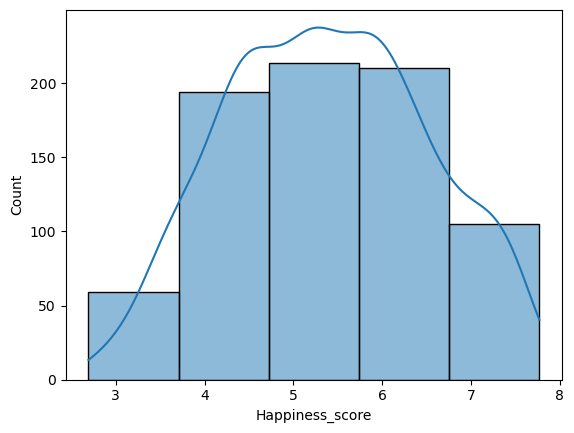

In [14]:
# Histogram for extreme values
sns.histplot(df_happy['Happiness_score'], bins=5, kde = True) 

In [15]:
df_happy.dtypes

Country               object
Region                object
Year                   int64
Happiness_rank         int64
Happiness_score      float64
GDP_capita           float64
Family               float64
Life_expectancy      float64
Freedom              float64
Gov_trust            float64
Generosity           float64
Dystopia_residual    float64
dtype: object

# 04 Creating Choropleth Map

In [16]:
# Creating a subset for happiness score and country
choropleth_happy = df_happy[['Country','Happiness_score']]

In [17]:
choropleth_happy.head()

,Country,Happiness_score
0,Afghanistan,3.575
1,Afghanistan,3.360
2,Afghanistan,3.794
3,Afghanistan,3.632
4,Afghanistan,3.203


In [18]:
# Creating extra df for just 2015
df_2015 = df_happy[df_happy['Year'] == 2015]

In [19]:
df_happy.head()

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
0,Afghanistan,Southern Asia,2015,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100
1,Afghanistan,Southern Asia,2016,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580
2,Afghanistan,Southern Asia,2017,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801
3,Afghanistan,Southern Asia,2018,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,NaN
4,Afghanistan,Southern Asia,2019,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,NaN


In [20]:
df_2015.shape

(158, 12)

In [21]:
df_2015.tail()

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
757,Venezuela,Latin America and Caribbean,2015,23,6.810,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131
762,Vietnam,Southeastern Asia,2015,75,5.360,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,2.20173
767,Yemen,Middle East and Northern Africa,2015,136,4.077,0.54649,0.68093,0.40064,0.35571,0.07854,0.09131,1.92313
772,Zambia,Sub-Saharan Africa,2015,85,5.129,0.47038,0.91612,0.29924,0.48827,0.12468,0.19591,2.63430
777,Zimbabwe,Sub-Saharan Africa,2015,115,4.610,0.27100,1.03276,0.33475,0.25861,0.08079,0.18987,2.44191


In [22]:
# Creating subset for 2015
choropleth_2015 = df_2015[['Country','Happiness_score']]

In [23]:
choropleth_2015.head()

,Country,Happiness_score
0,Afghanistan,3.575
5,Albania,4.959
10,Algeria,5.605
15,Angola,4.033
19,Argentina,6.574


In [24]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Creating choropleth map for 2015
folium.Choropleth(
    geo_data = country_geo, 
    data = choropleth_2015,
    columns = ['Country', 'Happiness_score'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

* South Sudan, Namibia, and Somalia had no records in 2015 

In [25]:
# Creating extra df for just 2016
df_2016 = df_happy[df_happy['Year'] == 2016]

In [28]:
# Creating subset for 2016
choropleth_2016 = df_2016[['Country','Happiness_score']]

In [32]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Creating choropleth map for 2016
folium.Choropleth(
    geo_data = country_geo, 
    data = choropleth_2016,
    columns = ['Country', 'Happiness_score'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [30]:
# Creating extra df for just 2017
df_2017 = df_happy[df_happy['Year'] == 2017]

In [31]:
# Creating subset for 2017
choropleth_2017 = df_2017[['Country','Happiness_score']]

In [33]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Creating choropleth map for 2017
folium.Choropleth(
    geo_data = country_geo, 
    data = choropleth_2017,
    columns = ['Country', 'Happiness_score'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [35]:
# Creating extra df for just 2018
df_2018 = df_happy[df_happy['Year'] == 2018]

In [38]:
# Creating subset for 2018
choropleth_2018 = df_2018[['Country','Happiness_score']]

In [39]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Creating choropleth map for 2018
folium.Choropleth(
    geo_data = country_geo, 
    data = choropleth_2018,
    columns = ['Country', 'Happiness_score'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [40]:
# Creating extra df for just 2019
df_2019 = df_happy[df_happy['Year'] == 2019]

In [41]:
# Creating subset for 2019
choropleth_2019 = df_2019[['Country','Happiness_score']]

In [42]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Creating choropleth map for 2019
folium.Choropleth(
    geo_data = country_geo, 
    data = choropleth_2019,
    columns = ['Country', 'Happiness_score'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [43]:
# GDP per capita choropleth
# Creating subset for 2015
choropleth_2015_GDP = df_2015[['Country','GDP_capita']]

In [45]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Creating choropleth map for 2015 analyzing GDP
folium.Choropleth(
    geo_data = country_geo, 
    data = choropleth_2015_GDP,
    columns = ['Country', 'GDP_capita'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [46]:
# GDP per capita choropleth
# Creating subset for 2016
choropleth_2016_GDP = df_2016[['Country','GDP_capita']]

In [47]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Creating choropleth map for 2016 analyzing GDP
folium.Choropleth(
    geo_data = country_geo, 
    data = choropleth_2016_GDP,
    columns = ['Country', 'GDP_capita'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [48]:
# GDP per capita choropleth
# Creating subset for 2017
choropleth_2017_GDP = df_2017[['Country','GDP_capita']]

In [49]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Creating choropleth map for 2017 analyzing GDP
folium.Choropleth(
    geo_data = country_geo, 
    data = choropleth_2017_GDP,
    columns = ['Country', 'GDP_capita'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [50]:
# GDP per capita choropleth
# Creating subset for 2018
choropleth_2018_GDP = df_2018[['Country','GDP_capita']]

In [51]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Creating choropleth map for 2018 analyzing GDP
folium.Choropleth(
    geo_data = country_geo, 
    data = choropleth_2018_GDP,
    columns = ['Country', 'GDP_capita'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [52]:
# GDP per capita choropleth
# Creating subset for 2019
choropleth_2019_GDP = df_2019[['Country','GDP_capita']]

In [53]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Creating choropleth map for 2019 analyzing GDP
folium.Choropleth(
    geo_data = country_geo, 
    data = choropleth_2019_GDP,
    columns = ['Country', 'GDP_capita'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

# 05 Discussion
This choropleth helped analyze how happiness ratings have changed over the years for different countries and regions.
This visualization didn't raise any new research questions for me, but it was very helpful for better understanding happiness scores over multiple years. It also let me analyze the relationship between a country's GDP per capita and there overall happiness score.